In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trial2/Project/1905.03375.pdf
/kaggle/input/trial2/Project/daisyRec/Untitled.ipynb
/kaggle/input/trial2/Project/daisyRec/LICENSE
/kaggle/input/trial2/Project/daisyRec/.gitignore
/kaggle/input/trial2/Project/daisyRec/test.py
/kaggle/input/trial2/Project/daisyRec/README.md
/kaggle/input/trial2/Project/daisyRec/model.pkl
/kaggle/input/trial2/Project/daisyRec/tune.py
/kaggle/input/trial2/Project/daisyRec/requirements.txt
/kaggle/input/trial2/Project/daisyRec/setup.py
/kaggle/input/trial2/Project/daisyRec/.idea/.gitignore
/kaggle/input/trial2/Project/daisyRec/.idea/daisyRec.iml
/kaggle/input/trial2/Project/daisyRec/.idea/modules.xml
/kaggle/input/trial2/Project/daisyRec/.idea/misc.xml
/kaggle/input/trial2/Project/daisyRec/.idea/vcs.xml
/kaggle/input/trial2/Project/daisyRec/.idea/inspectionProfiles/profiles_settings.xml
/kaggle/input/trial2/Project/daisyRec/log/mf/Apr-02-2023_15-43-41.log
/kaggle/input/trial2/Project/daisyRec/log/mf/Apr-02-2023_14-08-10.log
/kaggle/input/trial2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ratings = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv')



In [4]:
rating=ratings[:20000]

In [5]:
rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
19995,156,351,4.0,2002-11-24 02:37:52
19996,156,353,4.0,2002-12-27 22:31:22
19997,156,355,3.0,2002-12-26 23:15:26
19998,156,356,5.0,2002-12-26 20:41:00


In [6]:
interactions = rating.pivot_table(index='userId', columns='movieId', values='rating')


In [7]:
interactions

movieId,1,2,3,4,5,6,7,8,9,10,...,112623,112852,113453,114180,115617,116797,117511,117590,118696,125916
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


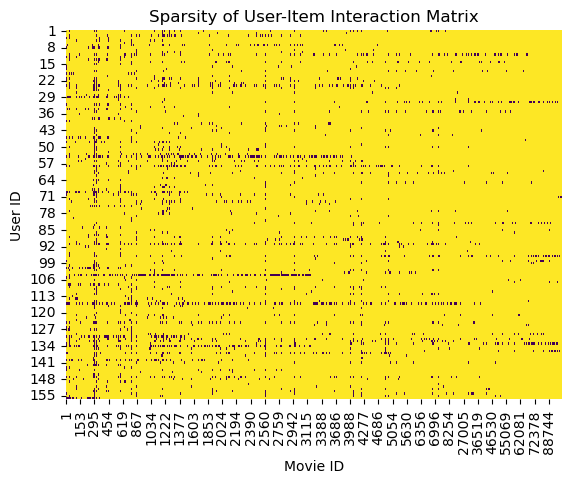

In [8]:
# Visualize the sparsity of the interaction matrix
sns.heatmap(interactions.isnull(), cmap='viridis', cbar=False)
plt.title('Sparsity of User-Item Interaction Matrix')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.show()

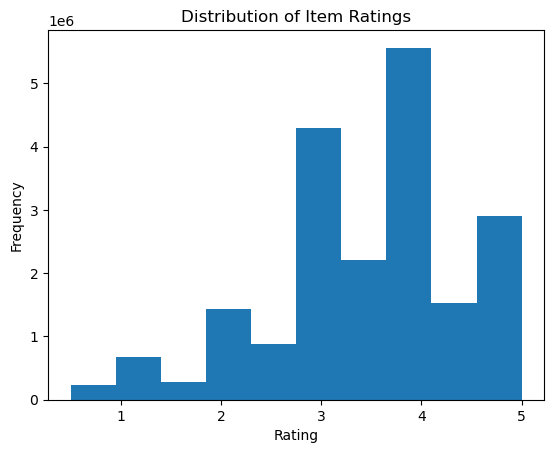

In [9]:
# Plot the distribution of item ratings
plt.hist(ratings['rating'], bins=10)
plt.title('Distribution of Item Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Compute the number of interactions per user and item
user_interactions = interactions.sum(axis=1)
item_interactions = interactions.sum(axis=0)


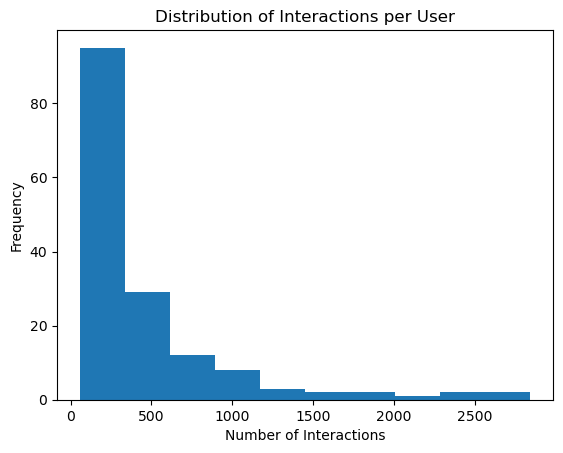

In [11]:
# Plot the distribution of interactions per user and item
plt.hist(user_interactions, bins=10)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


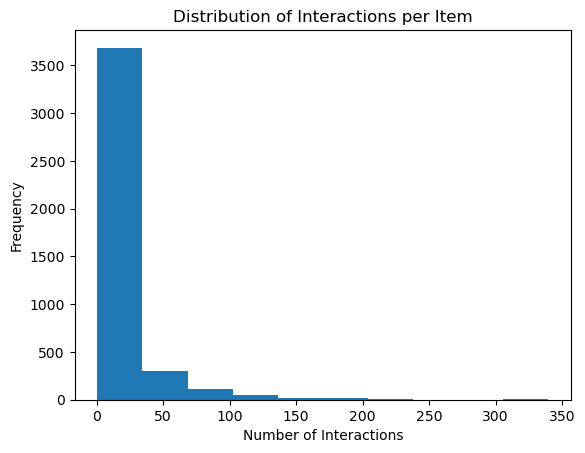

In [12]:
plt.hist(item_interactions, bins=10)
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()

In [13]:
!python3 /kaggle/input/model/Project/daisyRec/tune.py


Traceback (most recent call last):
  File "/kaggle/input/model/Project/daisyRec/tune.py", line 123, in <module>
    df = reader.get_data()
  File "/kaggle/input/model/Project/daisyRec/daisy/utils/loader.py", line 32, in get_data
    names=[self.uid_name, self.iid_name, self.inter_name, self.tid_name], engine='python')
  File "/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/opt/conda/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/opt/conda/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/opt/conda/lib/python3.7/site-packages/pandas/io/parsers/readers.py", line 1040, in _make_engine

In [14]:
cd /kaggle/input/trial22/Project 2/daisyRec/

/kaggle/input/trial22/Project 2/daisyRec


In [15]:
ls

LICENSE         daisy/   log/              res/      tune.py
README.md       data/    model.pkl         setup.py  tune_res/
Untitled.ipynb  images/  requirements.txt  test.py


In [16]:
!python3 test.py

Applying weights
After applying wieghts
/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
[Epoch 001]:   0%|                                        | 0/1 [00:00<?, ?it/s]Forward algorithm matrix after encoding
Forward algorithm mean tensor([[ 0.0994,  0.1591, -0.0258,  ..., -0.0071, -0.0824, -0.1208],
        [ 0.0113, -0.0703, -0.0671,  ..., -0.0411, -0.0337, -0.0188],
        [ 0.0393,  0.0075, -0.0173,  ..., -0.0842, -0.0629, -0.0182],
        ...,
        [ 0.1083,  0.0517, -0.0465,  ...,  0.0190, -0.0133, -0.0055],
        [ 0.0619, -0.0575, -0.0025,  ...,  0.0474,  0.0881, -0.1134]